<a href="https://colab.research.google.com/github/pramod-mamidi/sample/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data=keras.datasets.cifar10
(train_x,train_y),(test_x,test_y)=data.load_data()
train_x,test_x=train_x/255.0,test_x/255.0
names=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [0]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [8]:
model.fit(train_x,train_y,epochs=17,validation_data=(test_x,test_y))

Epoch 1/17
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5918 - accuracy: 0.4110 - val_loss: 1.3393 - val_accuracy: 0.5264
Epoch 2/17
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1833 - accuracy: 0.5767 - val_loss: 1.0975 - val_accuracy: 0.6110
Epoch 3/17
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0090 - accuracy: 0.6459 - val_loss: 1.0248 - val_accuracy: 0.6399
Epoch 4/17
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8993 - accuracy: 0.6833 - val_loss: 0.9343 - val_accuracy: 0.6748
Epoch 5/17
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8203 - accuracy: 0.7146 - val_loss: 0.9041 - val_accuracy: 0.6836
Epoch 6/17
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7540 - accuracy: 0.7369 - val_loss: 0.9044 - val_accuracy: 0.6910
Epoch 7/17
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7017 - accuracy: 0.7560 - val_loss: 0.8852 -

In [9]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 4s 13ms/step - loss: 1.0905 - accuracy: 0.7025


[1.0904663801193237, 0.7024999856948853]

In [0]:
prediction=model.predict(test_x)

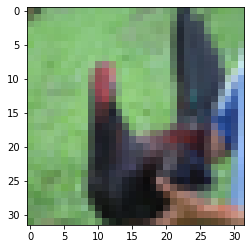

bird


In [12]:
plt.imshow(test_x[25])
plt.show()
print(names[np.argmax(prediction[25])])